# Task Part 1

### This script contains the following points:

#### Wrangling and Data Security
#### Creating crosstabs
#### Create customer profiles

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
import scipy

In [2]:
#import data
path = '/Users/kimballwightman/Documents/CareerFoundry/Instacart Basket Analysis'

In [5]:
final_merged = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','customers_merged.pkl'))

In [7]:
#view all the column headings to see what isn't relevant to analysis
pd.options.display.max_columns = None

In [8]:
final_merged.head()

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_flag,median_dspo,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [97]:
#drop columns irrelevant to analysis
final_merged.drop(columns = ['product_id','add_to_cart_order','reordered','product_name','aisle_id','max_order','avg_spend','median_dspo','_merge'])

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,region,low_activity_customer
0,2539329,1,1,2,8,NaN,True,7,9.0,Mid-Range Product,Regularly Busy,Regularly Busy,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,True
1,2398795,1,2,3,7,15.0,False,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,True
2,473747,1,3,3,12,21.0,False,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,True
3,2254736,1,4,4,7,29.0,False,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,True
4,431534,1,5,4,15,28.0,False,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089818,156685,106143,26,4,23,5.0,False,7,10.7,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,Regular Customer,High Spender,Frequent Customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,West,False
32089819,484769,66343,1,6,11,NaN,True,12,8.1,Mid-Range Product,Regularly Busy,Regularly Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,South,True
32089820,1561557,66343,2,1,11,30.0,False,12,8.1,Mid-Range Product,Regularly Busy,Busiest Days,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,South,True
32089821,276317,66343,3,6,15,19.0,False,12,8.1,Mid-Range Product,Regularly Busy,Regularly Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,South,True


In [98]:
final_merged.shape

(32089823, 36)

In [10]:
#data security and addressing PII
final_merged.drop(columns = ['First Name','Last Name'])

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_flag,median_dspo,frequency_flag,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089818,156685,106143,26,4,23,5.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,both
32089819,484769,66343,1,6,11,NaN,True,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-Range Product,Regularly Busy,Regularly Busy,Most Orders,4,New Customer,8.100000,Low Spender,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32089820,1561557,66343,2,1,11,30.0,False,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-Range Product,Regularly Busy,Busiest Days,Most Orders,4,New Customer,8.100000,Low Spender,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32089821,276317,66343,3,6,15,19.0,False,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-Range Product,Regularly Busy,Regularly Busy,Most Orders,4,New Customer,8.100000,Low Spender,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both


First and Last Name were removed as they are columns that can be used to trace back to single individuals. While scrubbing may not be advisable, this is all that's been suggested from the Achievement so far for data security. 

In [12]:
#create a regions variable
final_merged.loc[final_merged['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']),'region'] = 'Northeast'


In [13]:
final_merged.loc[final_merged['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest'


In [14]:
final_merged.loc[final_merged['STATE'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'


In [15]:
final_merged.loc[final_merged['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'West'


In [23]:
#check the new columns to make sure it's consistent with the state column
crosstab_region = pd.crosstab(final_merged['region'], final_merged['STATE'], dropna = False)

In [24]:
crosstab_region

STATE,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,0,0,0,0,0,0,0,0,0,0,0,0,0,627269,620945,618138,630269,0,0,0,0,0,626008,643603,0,633997,0,621109,0,0,0,0,0,0,632524,622358,0,0,0,0,0,628387,0,0,0,0,0,0,0,619810,0
Northeast,0,0,0,0,0,0,616165,0,0,0,0,0,0,0,0,0,0,0,0,630733,0,639850,0,0,0,0,0,0,0,612032,621441,0,629664,0,0,0,0,0,660551,650557,0,0,0,0,0,601959,0,0,0,0,0
South,630573,0,0,629424,0,0,0,630701,608265,623554,647993,0,0,0,0,0,0,627092,631113,0,622248,0,0,0,625730,0,0,0,0,0,0,0,0,646469,0,0,645192,0,0,0,631977,0,610317,635240,0,0,634241,0,606010,0,0
West,0,642660,649575,0,653455,632613,0,0,0,0,0,625223,598716,0,0,0,0,0,0,0,0,0,0,0,0,0,630980,0,631200,0,0,647637,0,0,0,0,0,630415,0,0,0,0,0,0,607125,0,0,627152,0,0,639564


In [25]:
#is there a difference in spending habits across regions?
crosstab_prices = pd.crosstab(final_merged['region'], final_merged['spending_flag'], dropna = False)

In [26]:
crosstab_prices

spending_flag,High Spender,Low Spender
region,,
Midwest,153928,7370489
Northeast,108001,5554951
South,208364,10477775
West,159051,8057264


It's a bit hard to compare the differences in spending habits between regions here, as some regions like the South have many more regions than others. Lets look at this crosstab again but as percents:

In [31]:
crosstab_prices_percent = pd.crosstab(final_merged['region'], final_merged['spending_flag'], dropna = False, normalize = 'index').round(2)

In [32]:
crosstab_prices_percent

spending_flag,High Spender,Low Spender
region,,
Midwest,0.02,0.98
Northeast,0.02,0.98
South,0.02,0.98
West,0.02,0.98


Here we can see that the proportion of high spenders to low spenders across regions is the same. We don't observe any significant difference in spending habits controlling for region.

In [41]:
#create an exclusion flag for low-activity customers
final_merged.loc[final_merged['user_order_num'] < 5, 'low_activity_customer'] = True

In [42]:
final_merged.loc[final_merged['user_order_num'] >= 5, 'low_activity_customer'] = False

In [43]:
final_merged_excluded = final_merged[final_merged['low_activity_customer'] == False]

In [46]:
final_merged_excluded.head(10)

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_flag,median_dspo,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,_merge,region,low_activity_customer
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Busiest Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Busiest Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Busiest Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
15,431534,1,5,4,15,28.0,False,12427,2,1,Original Beef Jerky,23,19,4.4,Low-Range Product,Least Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
16,3367565,1,6,2,7,19.0,False,12427,2,1,Original Beef Jerky,23,19,4.4,Low-Range Product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
17,550135,1,7,1,9,20.0,False,12427,3,1,Original Beef Jerky,23,19,4.4,Low-Range Product,Regularly Busy,Busiest Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
18,3108588,1,8,1,14,14.0,False,12427,1,1,Original Beef Jerky,23,19,4.4,Low-Range Product,Regularly Busy,Busiest Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False


In [96]:
final_merged_excluded.shape

(24177845, 37)

In [47]:
#export this new dataframe
final_merged_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','final_merged_excluded.pkl'))

In [52]:
#create a customer profile variable based on age and if they're a parent
final_merged_excluded.loc[(final_merged_excluded['Age'] < 40) & (final_merged_excluded['num_dependants'] == 0), 'customer_profile'] = 'Young Non-Parent'


In [51]:
final_merged_excluded.loc[(final_merged_excluded['Age'] < 40) & (final_merged_excluded['num_dependants'] > 0), 'customer_profile'] = 'Young Parent'


In [53]:
final_merged_excluded.loc[(final_merged_excluded['Age'] >= 40) & (final_merged_excluded['num_dependants'] == 0), 'customer_profile'] = 'Old Non-Parent'


In [54]:
final_merged_excluded.loc[(final_merged_excluded['Age'] >= 40) & (final_merged_excluded['num_dependants'] > 0), 'customer_profile'] = 'Old Parent'


One thing we discovered in one of the visualizations from the last Exercise was that we saw an income jump once individuals reached 40 years old. I segmented our customers on age whether they are above or below this 40-year-old mark, so now customer profiles are based on age, number of dependents, and income. Below is the scatterplot I'm referencing to. 

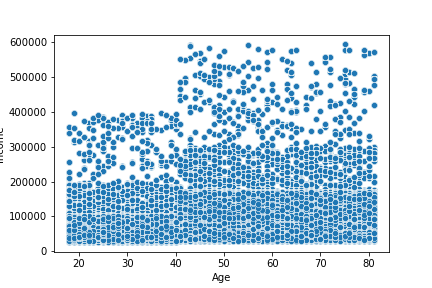

In [48]:
#this is the scatterplot from the last Exercise that demonstrates the relationship between age and income.
from IPython.display import Image
Image("/Users/kimballwightman/Documents/CareerFoundry/Instacart Basket Analysis/04 Analysis/Visualizations/scat_age_inc.png")

In [56]:
#make sure the customer_profile column executed properly
final_merged_excluded['customer_profile'].value_counts(dropna = False)

Old Parent          11867724
Young Parent         6267528
Old Non-Parent       3973150
Young Non-Parent     2069443
Name: customer_profile, dtype: int64

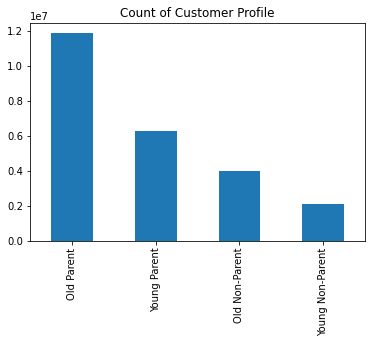

In [58]:
#create a bar chart of customer_profile
bar_1 = final_merged_excluded['customer_profile'].value_counts().plot.bar(title = 'Count of Customer Profile')

In [59]:
#aggregate max, mean, and min values on customer_profile level for usage frequency and expenditure
final_merged_excluded.groupby('customer_profile').agg({'user_order_num':['mean','min','max']})

user_order_num        
                           mean min max
customer_profile                       
Old Non-Parent        22.190733   5  99
Old Parent            21.859161   5  99
Young Non-Parent      21.893464   5  99
Young Parent          22.004636   5  99

In [64]:
#expenditure
final_merged_excluded.groupby('customer_profile').agg({'prices':['mean','min','max']})

prices           
                      mean  min   max
customer_profile                     
Old Non-Parent    7.796168  1.0  25.0
Old Parent        7.792008  1.0  25.0
Young Non-Parent  7.782721  1.0  25.0
Young Parent      7.787165  1.0  25.0

In [72]:
#compare your customer profiles with regions and department (as percents)
crosstab_region = pd.crosstab(final_merged_excluded['customer_profile'], final_merged_excluded['region'], dropna = False, normalize = 'index').round(3)

In [74]:
crosstab_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Old Non-Parent,0.237,0.174,0.331,0.259
Old Parent,0.234,0.178,0.330,0.258
Young Non-Parent,0.232,0.176,0.340,0.252
Young Parent,0.233,0.176,0.338,0.254


The proportion of customer profiles across each region is the same. It doesn't make a difference which region we're working with.

In [73]:
crosstab_dept = pd.crosstab(final_merged_excluded['customer_profile'], final_merged_excluded['department_id'], dropna = False, normalize = 'index').round(3)

In [75]:
crosstab_dept

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
Old Non-Parent,0.067,0.001,0.036,0.297,0.005,0.008,0.084,0.003,0.026,0.001,0.013,0.021,0.057,0.021,0.032,0.169,0.021,0.014,0.089,0.033,0.002
Old Parent,0.067,0.001,0.036,0.296,0.004,0.008,0.084,0.003,0.026,0.001,0.014,0.022,0.057,0.021,0.032,0.168,0.022,0.014,0.089,0.032,0.002
Young Non-Parent,0.064,0.001,0.036,0.297,0.005,0.008,0.084,0.003,0.026,0.001,0.014,0.021,0.056,0.021,0.032,0.169,0.022,0.014,0.089,0.032,0.002
Young Parent,0.067,0.001,0.036,0.296,0.005,0.008,0.082,0.003,0.026,0.001,0.013,0.021,0.057,0.022,0.032,0.170,0.022,0.014,0.090,0.032,0.002


The proportion of customer profiles for each department is the same as well.

Text(0, 0.5, 'Percent of Total')

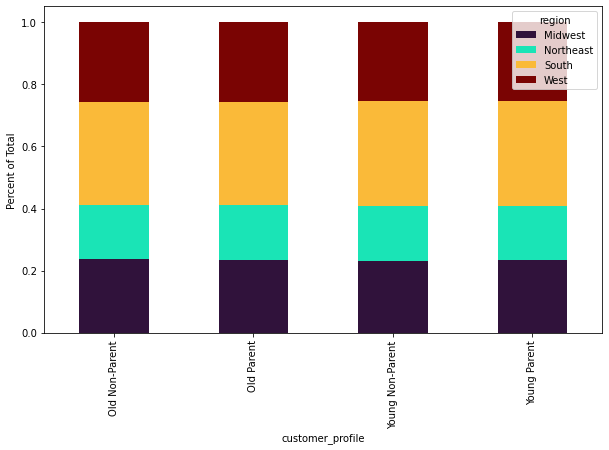

In [92]:
#create visualizations to demonstrate that behavior doesn't vary based on region or department.
bar_1 = crosstab_region.plot(kind='bar', 
                    stacked=True, 
                    colormap='turbo', 
                    figsize=(10, 6))
plt.pyplot.ylabel('Percent of Total')

Text(0, 0.5, 'Percent of Total')

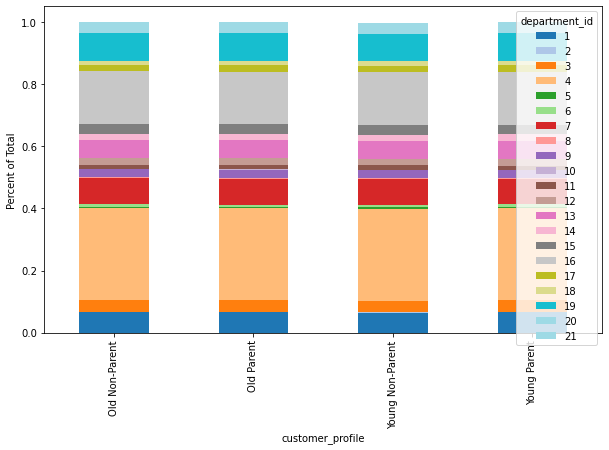

In [93]:
bar_2 = crosstab_dept.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20', 
                    figsize=(10, 6))
plt.pyplot.ylabel('Percent of Total')

In [94]:
#export visualizations
bar_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_profile_region.png'))

In [95]:
bar_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_profile_dept.png'))

<AxesSubplot:>

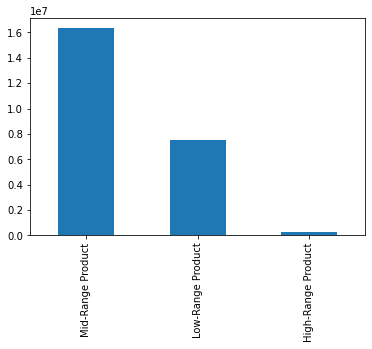

In [102]:
final_merged_excluded['price_range_loc'].value_counts().plot.bar()

<AxesSubplot:>

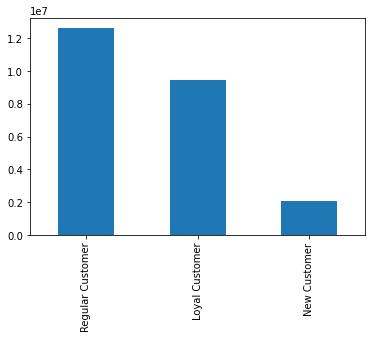

In [103]:
final_merged_excluded['loyalty_flag'].value_counts().plot.bar()### This script contains the following points:

####
####
####